In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
df = pd.read_csv('D:/College/SEM 6/Project/MLT/telecom_churn.csv')

# Preprocess the data
X = df.drop(columns=['state', 'phone number', 'churn'])
y = df['churn']
le = LabelEncoder()
X['international plan'] = le.fit_transform(X['international plan'])
X['voice mail plan'] = le.fit_transform(X['voice mail plan'])
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_accuracy = lr.score(X_test, y_test)
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy*100))

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)
print('Random Forest Accuracy: {:.2f}%'.format(rf_accuracy*100))

# Reshape the data for use in a convolutional neural network
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train a convolutional neural network model
model = keras.Sequential(
    [
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.Dropout(0.5),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(units=64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(units=1, activation='sigmoid'),
    ]
)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

# Print the model accuracy
cnn_accuracy = model.evaluate(X_test_cnn, y_test)[1]
print('Convolutional Neural Network Accuracy: {:.2f}%'.format(cnn_accuracy*100))

# Print the results in a nice format
print('\nResults:')
print('-'*60)
print('| Model\t\t\t\t|\t Accuracy |')
print('-'*60)
print('| Logistic Regression\t\t|\t {:.2f}% |'.format(lr_accuracy*100))
print('| Random Forest\t\t\t|\t {:.2f}% |'.format(rf_accuracy*100))
print('| Convolutional Neural Network\t|\t {:.2f}% |'.format(cnn_accuracy*100))
print('-'*60)


Logistic Regression Accuracy: 85.76%
Random Forest Accuracy: 94.30%
Epoch 1/10
84/84 [==============================] - 1s 4ms/step - loss: 0.4296 - accuracy: 0.8522 - val_loss: 0.3885 - val_accuracy: 0.8486
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8620 - val_loss: 0.3400 - val_accuracy: 0.8651
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8717 - val_loss: 0.3041 - val_accuracy: 0.8861
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8852 - val_loss: 0.2847 - val_accuracy: 0.9040
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.8890 - val_loss: 0.2632 - val_accuracy: 0.9055
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.8935 - val_loss: 0.2449 - val_accuracy: 0.9190
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0

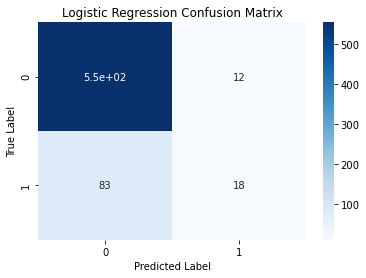

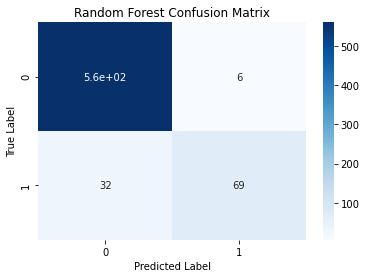

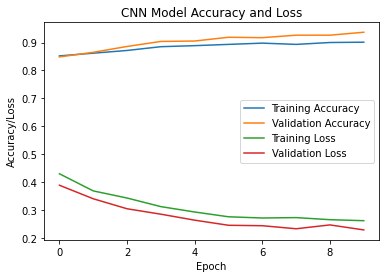

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Plot the confusion matrix for logistic regression
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the confusion matrix for random forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the accuracy and loss curves for the CNN
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

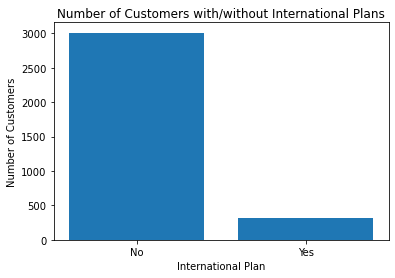

In [4]:
labels = ['No', 'Yes']
no_intl_plan = len(df[df['international plan'] == 'no'])
intl_plan = len(df[df['international plan'] == 'yes'])
values = [no_intl_plan, intl_plan]

plt.bar(labels, values)
plt.title('Number of Customers with/without International Plans')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.show()


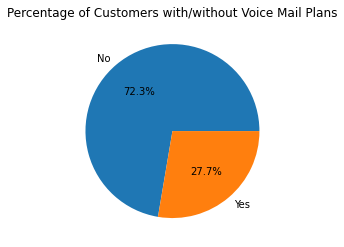

In [5]:
labels = ['No', 'Yes']
no_vm_plan = len(df[df['voice mail plan'] == 'no'])
vm_plan = len(df[df['voice mail plan'] == 'yes'])
values = [no_vm_plan, vm_plan]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Customers with/without Voice Mail Plans')
plt.show()

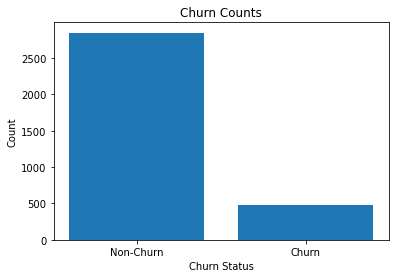

In [6]:
churn_counts = df['churn'].value_counts()
labels = ['Non-Churn', 'Churn']
plt.bar(labels, churn_counts)
plt.title('Churn Counts')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

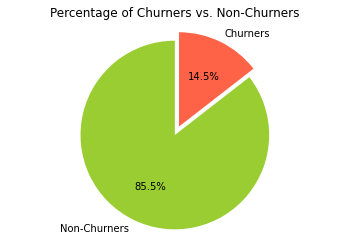

In [7]:
churn_count = df['churn'].value_counts()
labels = ['Non-Churners', 'Churners']
colors = ['#9ACD32', '#FF6347']
explode = (0, 0.1)
plt.pie(churn_count, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Churners vs. Non-Churners')
plt.axis('equal')
plt.show()

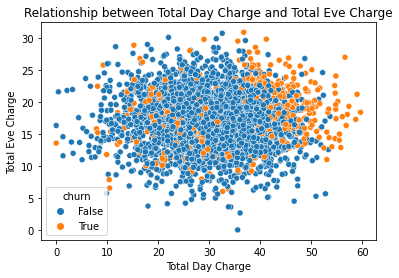

In [8]:
sns.scatterplot(data=df, x='total day charge', y='total eve charge', hue='churn')
plt.xlabel('Total Day Charge')
plt.ylabel('Total Eve Charge')
plt.title('Relationship between Total Day Charge and Total Eve Charge')
plt.show()

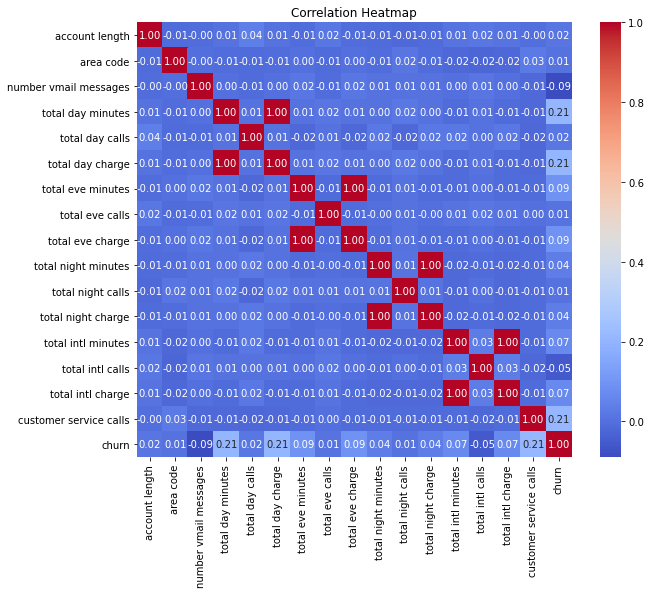

In [9]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()